In [2]:
import seaborn as sns
import pandas as pd
import csv

In [44]:
df = pd.read_csv('./grid_10_10.csv')
df.astype({'rand_string': 'str', 'graph': 'str', 'num_priority': 'int', 'priority_nodes': 'str'})
df1 = df.drop('num_patterns', axis = 1, inplace = False)
df1 = df1
# print(df1.head)

In [57]:
edges_removed = []
up_low = df1['upper_bound'] - df1['lower_bound']
tp_low = df1['time_period'] - df1['lower_bound']
for g in df1['graph']:
    # up_low.append(df1['upper_bound'] - df1['lower_bound'])
    # tp_low.append(df1['time_period'] - df1['lower_bound'])
    temp = g.split('_')
    if temp[2] == 'rand':
        edges_removed.append(int(temp[3]))
    else:
        edges_removed.append(int(0))
len(edges_removed)
df1['edges_removed'] = edges_removed
df1['overshoot1'] = up_low
df1['overshoot2'] = tp_low
df1['percent1'] = up_low/df1['lower_bound']
df1['percent2'] = tp_low/df1['lower_bound']
df1.astype({'edges_removed': 'category', 'num_priority': 'category'})

,rand_string,graph,num_priority,priority_nodes,lower_bound,upper_bound,time_period,edges_removed,overshoot1,overshoot2,percent1,percent2
0,0,grid_10_rand_10_0,10,13 49 3 38 56 84 37 85 34 71,3600,4200,6200,10,600,2600,0.166667,0.722222
1,1,grid_10_rand_10_0,10,80 3 93 7 35 16 32 6 34 36,4200,4200,4200,10,0,0,0.000000,0.000000
2,2,grid_10_rand_10_0,10,95 60 16 72 80 70 55 39 50 96,4000,4400,5400,10,400,1400,0.100000,0.350000
3,3,grid_10_rand_10_0,10,97 22 47 72 95 92 67 2 24 16,3800,3800,3800,10,0,0,0.000000,0.000000
4,4,grid_10_rand_10_0,10,6 62 34 13 16 85 5 99 92 8,4400,4800,4800,10,400,400,0.090909,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...
625,625,grid_10_rand_20_4,20,49 75 68 33 6 62 36 65 53 45 52 31 18 78 5 80 ...,5600,5600,5600,20,0,0,0.000000,0.000000
626,626,grid_10_rand_20_4,20,86 87 69 36 78 12 68 84 63 28 91 31 83 19 45 6...,5400,5400,5400,20,0,0,0.000000,0.000000
627,627,grid_10_rand_20_4,20,35 55 63 28 5 23 95 15 77 64 36 54 10 65 48 1 ...,5600,5600,5600,20,0,0,0.000000,0.000000
628,628,grid_10_rand_20_4,20,82 22 95 38 94 50 43 9 47 27 66 55 59 96 81 24...,6200,6200,6200,20,0,0,0.000000,0.000000


0      600
1        0
2      400
3        0
4      400
      ... 
625      0
626      0
627      0
628      0
629      0
Length: 630, dtype: int64


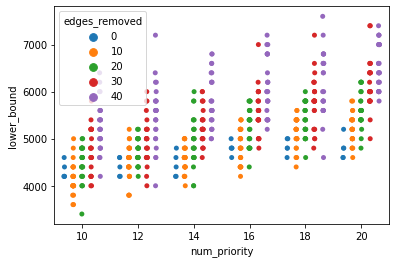

In [42]:
p1 = sns.stripplot(x = 'num_priority', y = 'lower_bound', data = df1, jitter = 0.05, hue = 'edges_removed', dodge = True)
p1.legend(title = 'Edges Removed', bbox_to_anchor = [1.03, 1])
p1.set_xlabel('Number of Priority Nodes')
p1.set_ylabel('Lower Bound')
p1.set_title('Lower Bound vs Num. of Priority Nodes for Graphs based on 10X10 Grid')


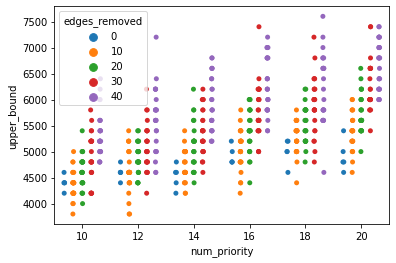

In [49]:
p2 = sns.stripplot(x = 'num_priority', y = 'upper_bound', data = df1, jitter = 0.05, hue = 'edges_removed', dodge = True)
p2.legend(title = 'Edges Removed', bbox_to_anchor = [1.03, 1])
p2.set_xlabel('Number of Priority Nodes')
p2.set_ylabel('Upper Bound')
p2.set_title('Upper Bound vs Num. of Priority Nodes for Graphs based on 10X10 Grid')

Text(0.5, 1.0, 'Overshoot 1 vs Num. of Priority Nodes for Graphs based on 10X10 Grid')

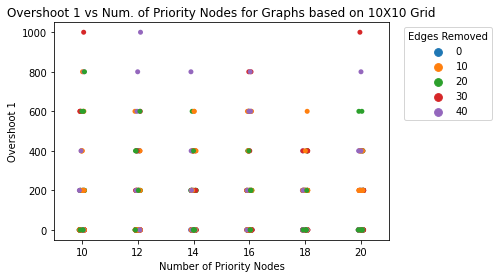

In [74]:
p3 = sns.stripplot(x = 'num_priority', y = 'overshoot1', data = df1, jitter = 0.05, hue = 'edges_removed')
p3.legend(title = 'Edges Removed', bbox_to_anchor = [1.03, 1])
p3.set_xlabel('Number of Priority Nodes')
p3.set_ylabel('Overshoot 1')
p3.set_title('Overshoot 1 vs Num. of Priority Nodes for Graphs based on 10X10 Grid')

Text(0.5, 1.0, 'Overshoot 2 vs Num. of Priority Nodes for Graphs based on 10X10 Grid')

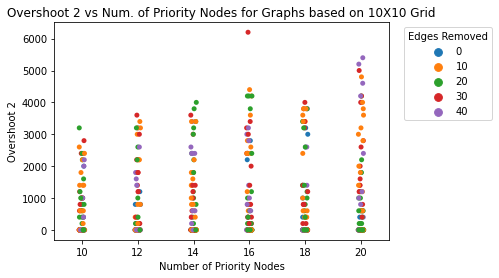

In [70]:
p4 = sns.stripplot(x = 'num_priority', y = 'overshoot2', data = df1, jitter = 0.05, hue = 'edges_removed')
p4.legend(title = 'Edges Removed', bbox_to_anchor = [1.03, 1])
p4.set_xlabel('Number of Priority Nodes')
p4.set_ylabel('Overshoot 2')
p4.set_title('Overshoot 2 vs Num. of Priority Nodes for Graphs based on 10X10 Grid')

Text(0.5, 1.0, 'Overshoot 1 (%) vs Num. of Priority Nodes for Graphs based on 10X10 Grid')

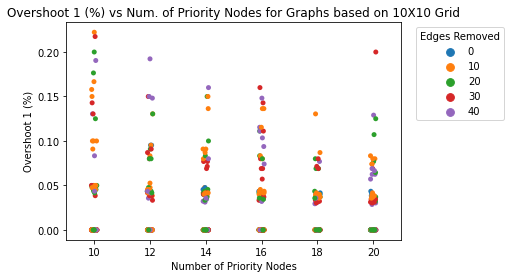

In [66]:
p5 = sns.stripplot(x = 'num_priority', y = 'percent1', data = df1, jitter = 0.05, hue = 'edges_removed')
p5.legend(title = 'Edges Removed', bbox_to_anchor = [1.03, 1])
p5.set_xlabel('Number of Priority Nodes')
p5.set_ylabel('Overshoot 1 (%)')
p5.set_title('Overshoot 1 (%) vs Num. of Priority Nodes for Graphs based on 10X10 Grid')

Text(0.5, 1.0, 'Overshoot 2 (%) vs Num. of Priority Nodes for Graphs based on 10X10 Grid')

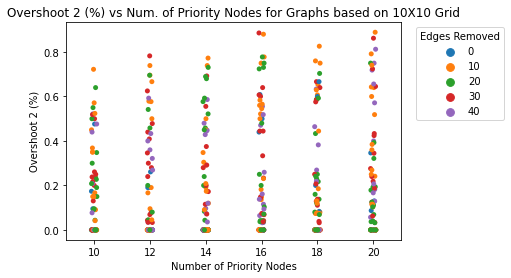

In [71]:
p6 = sns.stripplot(x = 'num_priority', y = 'percent2', data = df1, jitter = 0.05, hue = 'edges_removed')
p6.legend(title = 'Edges Removed', bbox_to_anchor = [1.03, 1])
p6.set_xlabel('Number of Priority Nodes')
p6.set_ylabel('Overshoot 2 (%)')
p6.set_title('Overshoot 2 (%) vs Num. of Priority Nodes for Graphs based on 10X10 Grid')